In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('C:\\Users\\SONY i5\\Downloads\\redi 10 11\\line_ reg_hotel_pr\\tour_dataset0711212.xlsx')
df.head()

,id,sales_date,status,agency_name,agency_category,tour_start_date,tour_end_date,tour_duration,month_of_stay,season,...,additional_services_cost_price,tour_cost_price,total_tour_price,total_profit,agency_commission,profit_after_agency_commission,profit_after_agency_commission_and_tax,profit_margin,tour_price_per_day,tour_price_pp_per_day
0,2824,2018-04-01,cancelled,Agency_17,tour office,2019-10-01,2019-10-15,14,October,low,...,0.0,1012.14,1158.064240,145.924240,115.81,30.114240,24.39,2.11,82.718874,41.359437
1,1409,2019-03-24,confirmed,Agency_21,top agency,2019-10-24,2019-11-03,10,October,low,...,0.0,2563.10,2901.365770,338.265770,290.14,48.125770,38.98,1.34,290.136577,58.027315
2,5506,2018-04-19,confirmed,Agency_15,top agency,2019-06-30,2019-07-10,10,June,low,...,0.0,1047.37,1177.979281,130.609281,117.80,12.809281,10.38,0.88,117.797928,58.898964
3,5012,2018-09-07,confirmed,Agency_11,top agency,2019-03-15,2019-03-29,14,March,high,...,0.0,1905.91,2199.213211,293.303211,219.92,73.383211,59.44,2.70,157.086658,52.362219
4,4657,2019-03-23,cancelled,Agency_23,tour office,2019-01-07,2019-01-14,7,January,high,...,0.0,1609.59,1782.232441,172.642441,178.22,-5.577559,-4.52,-0.25,254.604634,127.302317


id: A unique identifier for each booking or tour record. It ensures that each entry in the dataset can be tracked individually.

sales_date: The date when the tour was booked or sold. It provides insight into the timing of the sale.

status: The current status of the booking (e.g., confirmed, canceled, pending, etc.). This helps track the progress of the tour.

agency_name: The name of the travel agency handling the tour booking. This is useful for identifying the agency managing the sales.

agency_category: The classification or type of travel agency (e.g., online, traditional, luxury, budget). It helps categorize agencies by their market focus.

tour_start_date: The date when the tour begins. This marks the start of the actual tour experience for customers.

tour_end_date: The date when the tour ends. This is used to calculate the total duration of the tour and when the tourists return.

tour_duration: The total length of the tour, typically in days. It indicates how long the customers will be on the tour.

month_of_stay: The month during which the tourists are staying at the destination. This helps in analyzing seasonal trends.

season: The season during which the tour occurs (e.g., winter, summer, low season, high season). This is important for understanding the time of year and its influence on pricing and demand.

departure_airport: The airport from which the tourists will depart. This helps to know the point of origin for the travelers.

destination_country: The country where the tourists are traveling to. This indicates the geographical location of the tour destination.

destination_region: The specific region within the destination country (e.g., Southern France, Caribbean). This can give a more detailed understanding of the travel location.

arrival_airport: The airport at the destination where the tourists will arrive. This helps to track where the tourists land at their destination.

hotel_name: The name of the hotel where tourists will be staying during the tour. It’s useful for tracking accommodation specifics.

hotel_stars: The star rating of the hotel (e.g., 3 stars, 5 stars). This gives an idea of the quality or class of the accommodation.

hotel_rating_on_tours.ua: The rating of the hotel specifically on the tours.ua platform (could be based on reviews or other criteria). This indicates how well the hotel is rated by tourists on the platform.

number_of_tourists: The total number of tourists booked for the tour. This indicates the group size for the tour.

room_category: The type or category of the room(s) booked for the tourists (e.g., single, double, suite). This provides more detail on the accommodation type.

airfare_price_per_tourist: The cost of the airfare per individual tourist. It reflects the transportation cost to and from the destination.

airfare_for_all_tourists: The total airfare cost for all tourists in the booking. This is the collective airfare price for the entire group.

hotel_price_per_night_per_tourist: The cost of the hotel per night per individual tourist. This reflects the accommodation price on a per-person, per-night basis.

hotel_price_per_night_for_all_tourists: The total cost of the hotel per night for all tourists. This is the sum of accommodation costs for the entire group, per night.

hotel_price_for_full_period: The total cost of the hotel accommodation for the entire duration of the tour. This reflects the total accommodation cost for the full stay.

transfer: Indicates whether a transfer (e.g., transportation to/from the airport or hotel) is included in the tour package. It shows whether the package includes this service.

transfer_cost: The cost of the transfer service, if included in the package. This is the price associated with transportation services provided to the tourists.

additional_services: A description or a flag indicating if additional services (e.g., excursions, meals, activities) are included in the tour package. This can show the added features in the package.

additional_services_cost: The cost of any additional services provided during the tour (e.g., extra excursions, guided tours). This reflects the cost for these added services.

airfare_cost_price: The base cost price of the airfare without any additional charges. This helps understand the original cost of the flight before markup.

hotel_cost_price: The base cost price for the hotel, excluding any additional charges. This is the original cost of the accommodation before any margin is applied.

transfer_cost_price: The base cost price for the transfer service. This represents the original cost of transport services.

additional_services_cost_price: The cost price for additional services, excluding markup. This shows the underlying cost of the extra services provided.

tour_cost_price: The total base cost for the entire tour (including airfare, hotel, transfer, and additional services). This is the combined cost of all elements of the tour before profit.

total_tour_price: The final price of the entire tour, which includes markup and profit. This is what the customer actually pays for the tour.

total_profit: The total profit earned by the agency or company from the tour after deducting all costs. This shows the overall financial gain from the booking.

agency_commission: The commission earned by the agency for booking the tour. This is usually a percentage of the total tour price or a fixed amount.

profit_after_agency_commission: The profit remaining after the agency’s commission has been deducted from the total profit. This is the actual profit the tour operator earns.

profit_after_agency_commission_and_tax: The final profit after the agency commission and taxes have been subtracted. This gives the net profit after all expenses and obligations.

profit_margin: The percentage of profit relative to the total tour price. This is calculated as (profit after agency commission and tax / total tour price) * 100, and indicates the profitability of the tour.

tour_price_per_day: The average price per day of the tour, calculated by dividing the total tour price by the tour duration. This is useful for analyzing the cost per day of the tour experience.

tour_price_pp_per_day: The price per person per day for the tour. It is calculated by dividing the total tour price by the number of tourists and the tour duration. This helps to understand the per capita cost per day for each tourist.

In [3]:
df.describe()

,id,sales_date,tour_start_date,tour_duration,hotel_stars,hotel_rating_on_tours.ua,number_of_tourists,airfare_price_per_tourist,airfare_for_all_tourists,hotel_price_per_night_per_tourist,...,additional_services_cost_price,tour_cost_price,total_tour_price,total_profit,agency_commission,profit_after_agency_commission,profit_after_agency_commission_and_tax,profit_margin,tour_price_per_day,tour_price_pp_per_day
count,1302.000000,1302,1302,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,...,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000
mean,5507.328725,2019-01-09 18:12:43.133640704,2019-07-03 02:17:08.571428608,10.290323,2.526882,4.939432,2.913978,572.473886,1675.285714,20.602542,...,14.584055,2044.606667,2331.959156,287.352490,233.195929,54.156560,43.866720,1.716229,241.079999,82.872052
min,1006.000000,2018-01-02 00:00:00,2019-01-02 00:00:00,7.000000,0.000000,0.020000,1.000000,330.000000,331.000000,4.020000,...,0.000000,336.680000,371.476709,34.796709,37.150000,-26.702113,-21.630000,-0.900000,32.057034,28.595002
25%,3222.250000,2018-07-14 00:00:00,2019-03-31 00:00:00,7.000000,1.000000,2.490000,2.000000,430.000000,830.000000,10.602500,...,0.000000,996.677500,1131.953837,134.436031,113.197500,7.097965,5.747500,0.420000,112.194121,53.794911
50%,5502.000000,2019-01-12 12:00:00,2019-07-05 00:00:00,10.000000,3.000000,4.840000,3.000000,479.500000,1447.000000,16.625000,...,0.000000,1772.705000,1999.198280,235.642400,199.920000,25.886054,20.965000,1.290000,198.271801,75.409653
75%,7783.500000,2019-07-05 00:00:00,2019-09-27 00:00:00,14.000000,4.000000,7.317500,4.000000,745.750000,2278.750000,27.772500,...,0.000000,2669.080000,3048.690437,373.295898,304.872500,84.906728,68.775000,2.527500,319.760082,105.279543
max,9998.000000,2019-12-30 00:00:00,2019-12-31 00:00:00,14.000000,5.000000,9.990000,5.000000,860.000000,4300.000000,60.410000,...,129.910000,7065.350000,8314.459433,1249.109433,831.450000,427.015612,345.880000,11.150000,910.579582,195.097678
std,2561.816836,NaN,NaN,2.876962,1.707820,2.831621,1.437492,172.780100,1020.915288,13.412825,...,32.744827,1329.393309,1529.418297,206.555379,152.941899,67.870678,54.975135,1.818295,167.791924,36.025398


In [4]:
df.shape

(1302, 41)

In [5]:
print(df.head().to_string())


     id sales_date     status agency_name agency_category tour_start_date tour_end_date  tour_duration month_of_stay season departure_airport destination_country destination_region arrival_airport hotel_name  hotel_stars  hotel_rating_on_tours.ua  number_of_tourists room_category  airfare_price_per_tourist  airfare_for_all_tourists  hotel_price_per_night_per_tourist  hotel_price_per_night_for_all_tourists  hotel_price_for_full_period    transfer  transfer_cost additional_services  additional_services_cost  airfare_cost_price  hotel_cost_price  transfer_cost_price  additional_services_cost_price  tour_cost_price  total_tour_price  total_profit  agency_commission  profit_after_agency_commission  profit_after_agency_commission_and_tax  profit_margin  tour_price_per_day  tour_price_pp_per_day
0  2824 2018-04-01  cancelled   Agency_17     tour office      2019-10-01    2019-10-15             14       October    low            Dnipro            Thailand            Bangkok         Bangkok   H

In [6]:

total_profit_after_tax = df["profit_after_agency_commission_and_tax"].sum()
print(total_profit_after_tax)


57114.47


In [31]:
df_1 = df
df_v=df

In [8]:
df_1['tour_price_per_day'] = df_1['total_tour_price'] / df_1['tour_duration']


In [9]:
df_1['tour_price_pp_per_day'] = df_1['tour_price_per_day'] / df_1['number_of_tourists']


visual

In [11]:
df_v = pd.get_dummies(df_v, columns=['status'], drop_first=False)

In [16]:
print(df_v.head().to_string())

     id sales_date agency_name agency_category tour_start_date tour_end_date  tour_duration month_of_stay season departure_airport destination_country destination_region arrival_airport hotel_name  hotel_stars  hotel_rating_on_tours.ua  number_of_tourists room_category  airfare_price_per_tourist  airfare_for_all_tourists  hotel_price_per_night_per_tourist  hotel_price_per_night_for_all_tourists  hotel_price_for_full_period    transfer  transfer_cost additional_services  additional_services_cost  airfare_cost_price  hotel_cost_price  transfer_cost_price  additional_services_cost_price  tour_cost_price  total_tour_price  total_profit  agency_commission  profit_after_agency_commission  profit_after_agency_commission_and_tax  profit_margin  tour_price_per_day  tour_price_pp_per_day  status_cancelled  status_confirmed  status_not confirmed    month
0  2824 2018-04-01   Agency_17     tour office      2019-10-01    2019-10-15             14       October    low            Dnipro            Th

In [14]:
df_v['sales_date'] = pd.to_datetime(df_v['sales_date'])

df_v['month'] = df_v['sales_date'].dt.to_period('M')

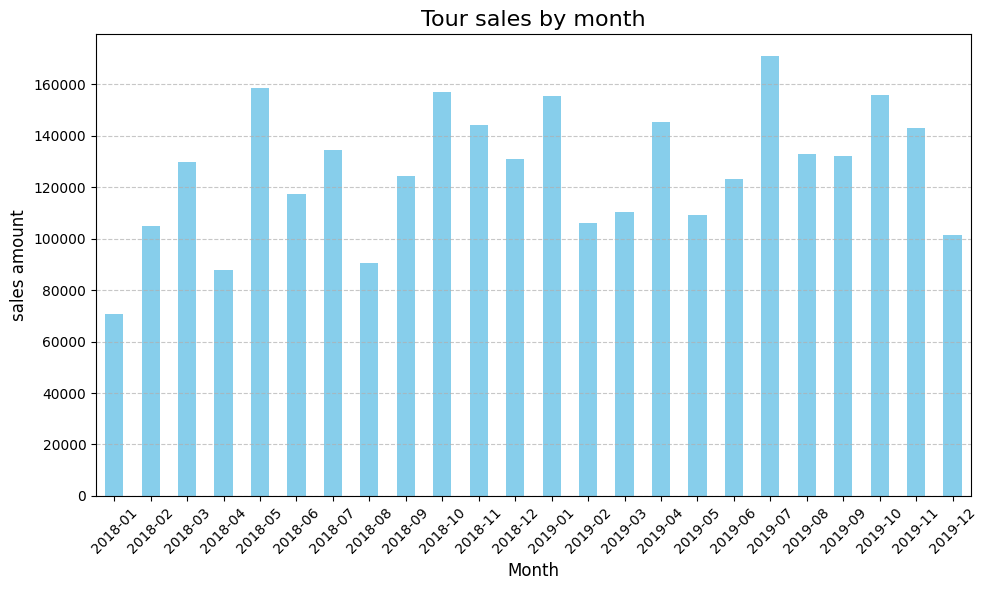

In [17]:
monthly_sales = df_v.groupby('month')['total_tour_price'].sum()
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Tour sales by month', fontsize=16)
plt.xlabel('Мonth', fontsize=12)
plt.ylabel('sales amount', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

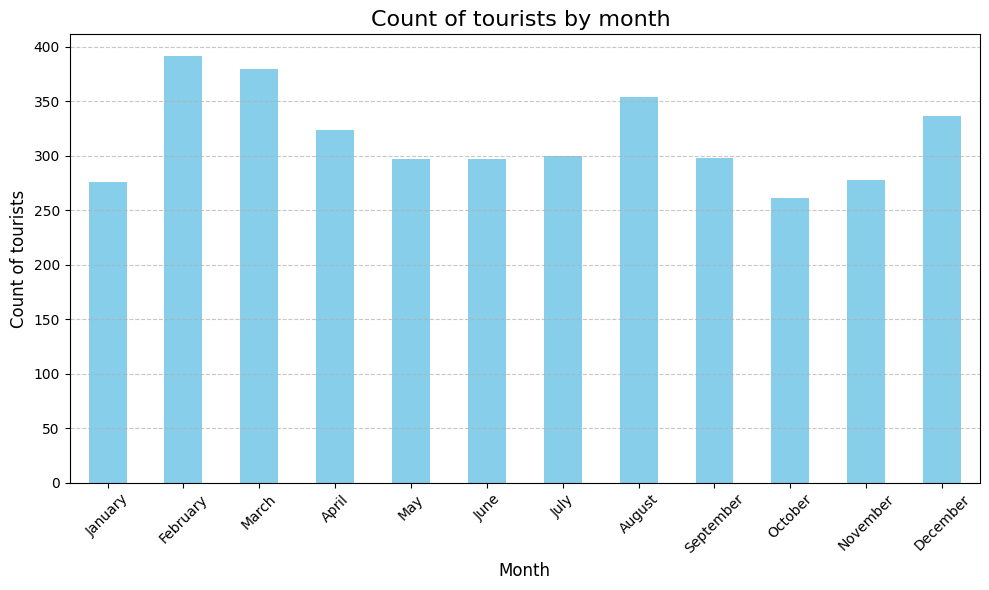

In [18]:
monthly_sales = df_v.groupby('month_of_stay')['number_of_tourists'].sum()
monthly_sales = monthly_sales.sort_index()
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Count of tourists by month ', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count of tourists', fontsize=12)
plt.xticks(ticks=range(12), labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

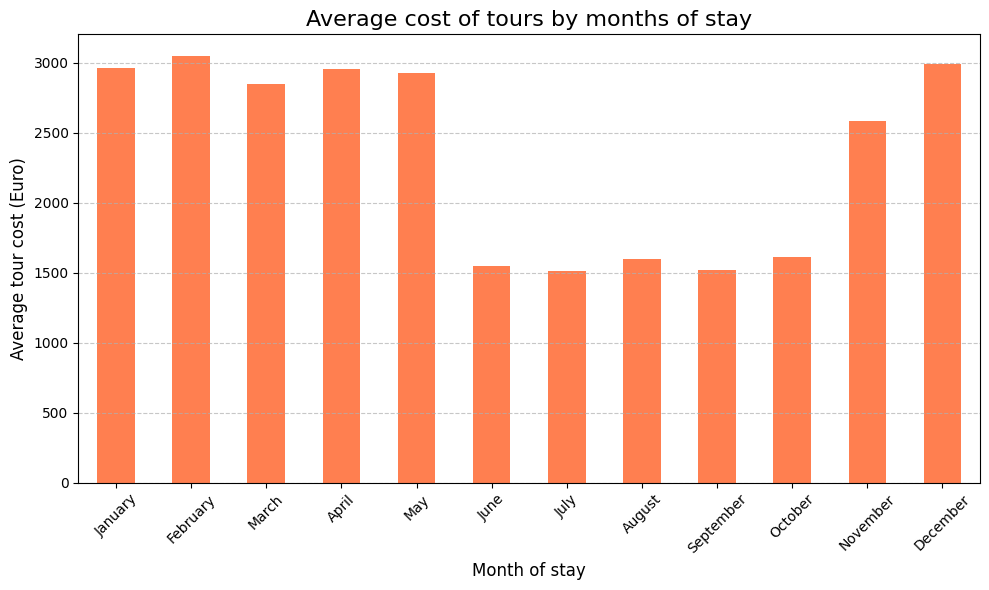

In [25]:
months_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
if not df_v['month_of_stay'].isin(months_order).all():
    print("Data in 'month_of_stay'Error_001")
else:
    
    monthly_prices = df_v.groupby('month_of_stay')['total_tour_price'].mean()
    monthly_prices = monthly_prices.reindex(months_order, fill_value=0)
 
    plt.figure(figsize=(10, 6))
    monthly_prices.plot(kind='bar', color='coral')
    plt.title('Average cost of tours by months of stay', fontsize=16)
    plt.xlabel('Month of stay', fontsize=12)
    plt.ylabel('Average tour cost (Euro)', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


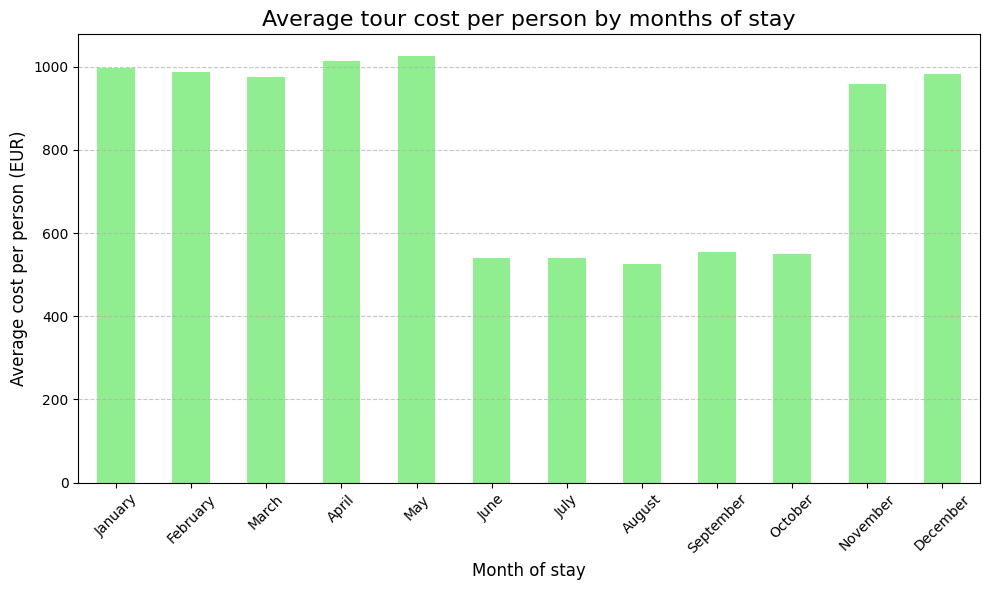

In [26]:
df_v['price_per_person'] = df_v['total_tour_price'] / df_v['number_of_tourists']
months_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
if not df_v['month_of_stay'].isin(months_order).all():
    print("Data in 'month_of_stay'Error_001")
else:
    monthly_price_per_person = df_v.groupby('month_of_stay')['price_per_person'].mean()
    monthly_price_per_person = monthly_price_per_person.reindex(months_order, fill_value=0)
    plt.figure(figsize=(10, 6))
    monthly_price_per_person.plot(kind='bar', color='lightgreen')
    plt.title('Average tour cost per person by months of stay', fontsize=16)
    plt.xlabel('Month of stay', fontsize=12)
    plt.ylabel('Average cost per person (EUR)', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


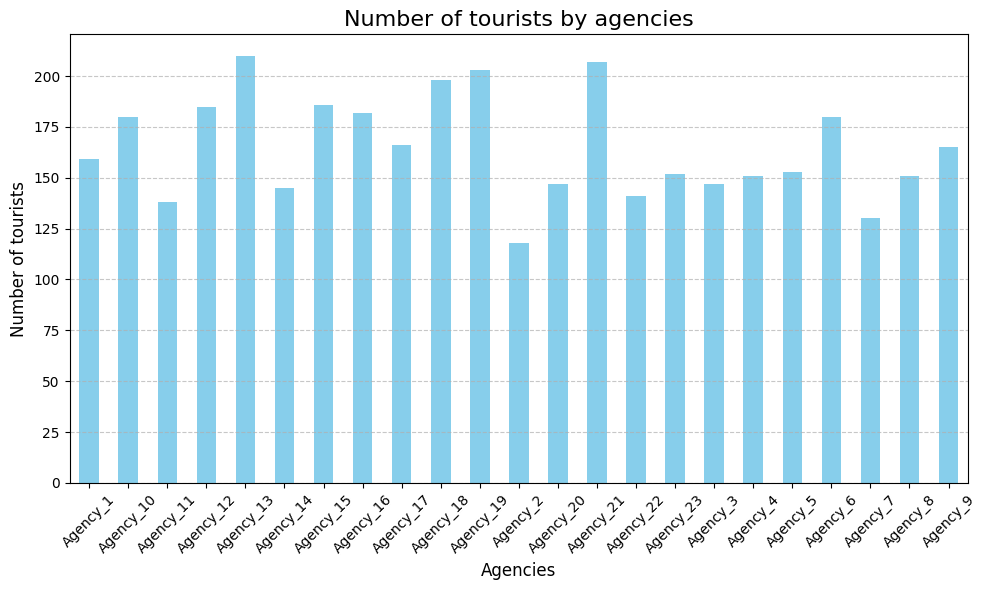

In [27]:
agency_sales = df_v.groupby('agency_name').agg (total_tourists=('number_of_tourists', 'sum'))
plt.figure(figsize=(10, 6))
agency_sales['total_tourists'].plot(kind='bar', color='skyblue')
plt.title('Number of tourists by agencies', fontsize=16)
plt.xlabel('Agencies', fontsize=12)
plt.ylabel('Number of tourists', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

  

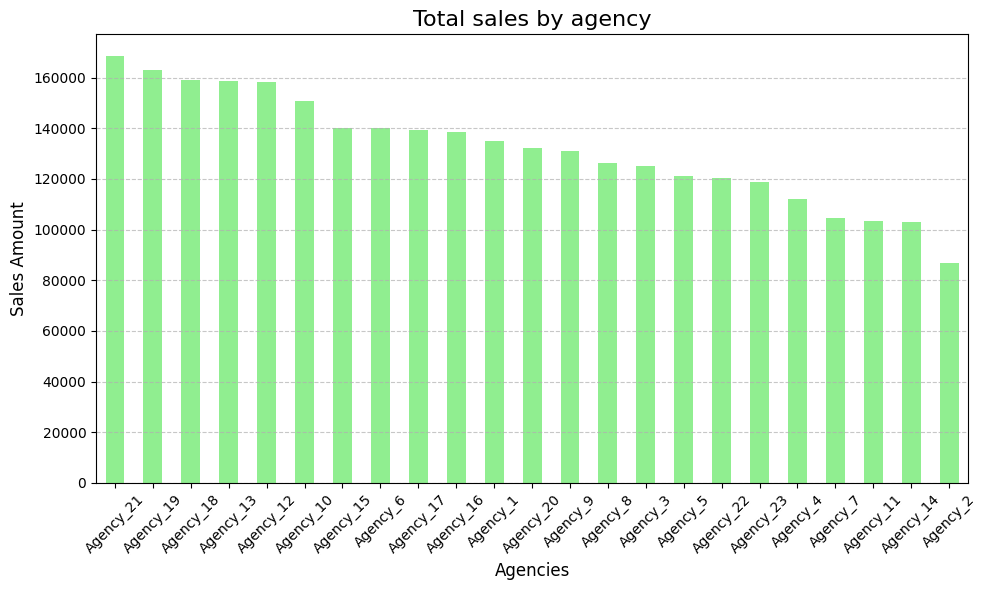

In [28]:
agency_sales = df_v.groupby('agency_name').agg(total_sales=('total_tour_price', 'sum')   
)
agency_sales = agency_sales.sort_values(by='total_sales', ascending=False)
plt.figure(figsize=(10, 6))
agency_sales['total_sales'].plot(kind='bar', color='lightgreen')
plt.title('Total sales by agency', fontsize=16)
plt.xlabel('Agencies', fontsize=12)
plt.ylabel('Sales Amount', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

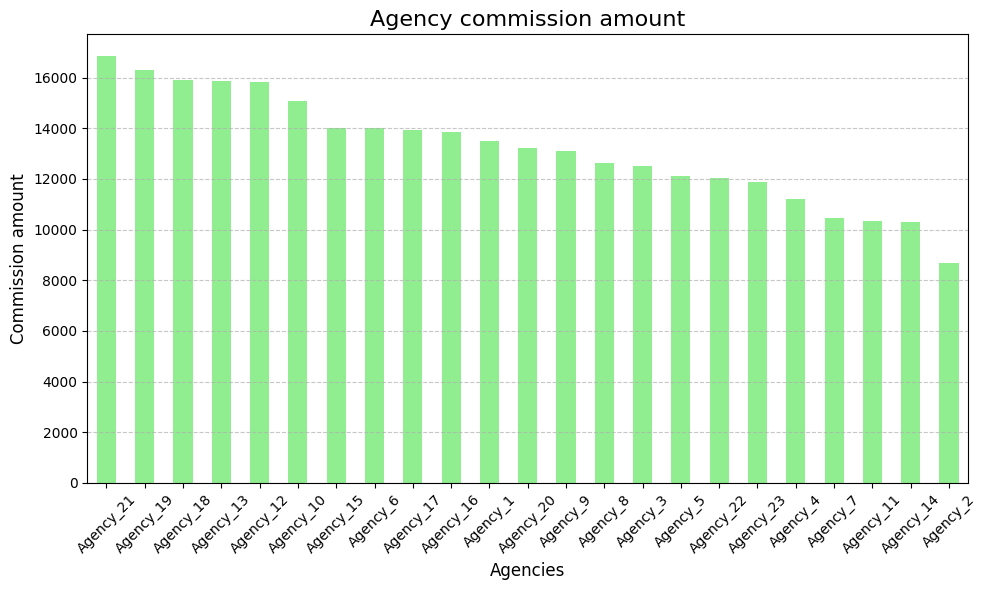

In [29]:
agency_sales = df_v.groupby('agency_name').agg(total_sales=('agency_commission', 'sum')   
)
agency_sales = agency_sales.sort_values(by='total_sales', ascending=False)
plt.figure(figsize=(10, 6))
agency_sales['total_sales'].plot(kind='bar', color='lightgreen')
plt.title('Agency commission amount', fontsize=16)
plt.xlabel('Agencies', fontsize=12)
plt.ylabel('Commission amount', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

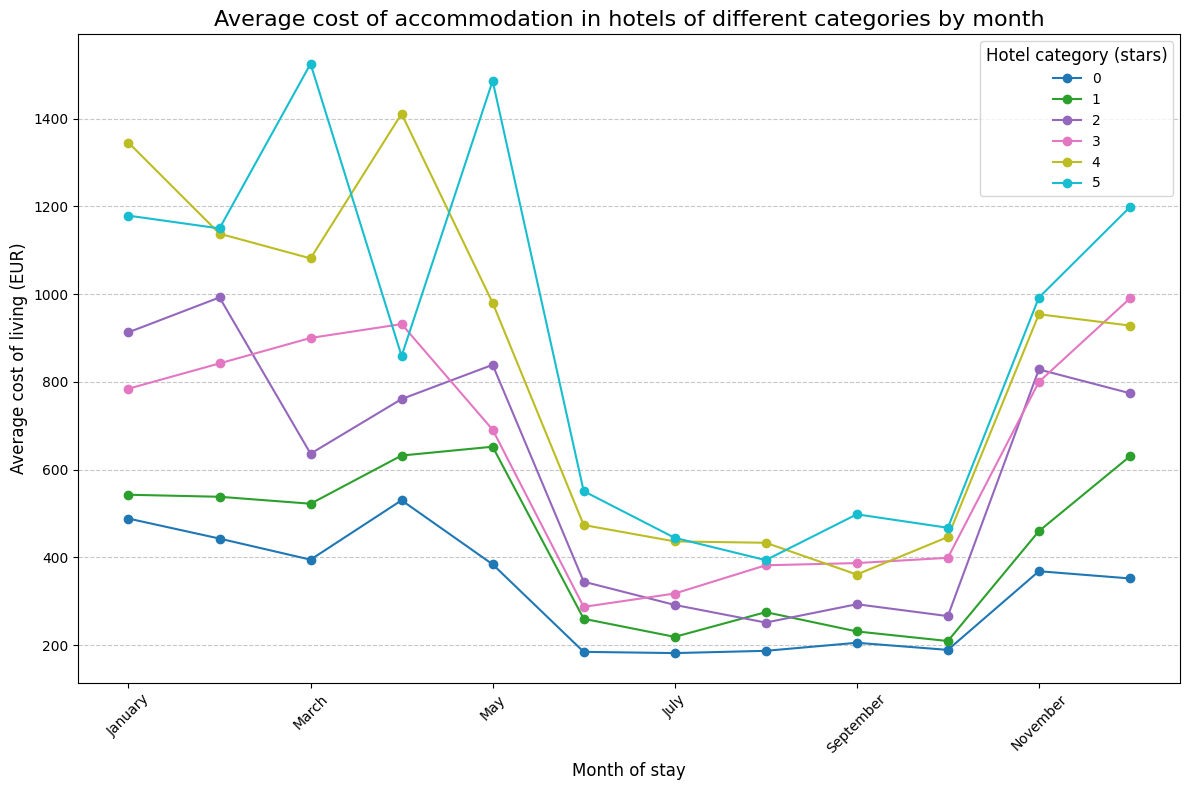

In [30]:
hotel_prices_by_month = df_v.groupby(['month_of_stay', 'hotel_stars'])['hotel_price_for_full_period'].mean().unstack()

hotel_prices_by_month = hotel_prices_by_month.loc[months_order]

plt.figure(figsize=(12, 8))
hotel_prices_by_month.plot(kind='line', marker='o', figsize=(12, 8), colormap='tab10')

plt.title('Average cost of accommodation in hotels of different categories by month', fontsize=16)
plt.xlabel('Month of stay', fontsize=12)
plt.ylabel('Average cost of living (EUR)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Hotel category (stars)', title_fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


C:\Users\SONY i5\AppData\Local\Temp\ipykernel_4768\37456624.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bangkok_hotels['price_per_person_per_night'] = (


<Figure size 1200x800 with 0 Axes>

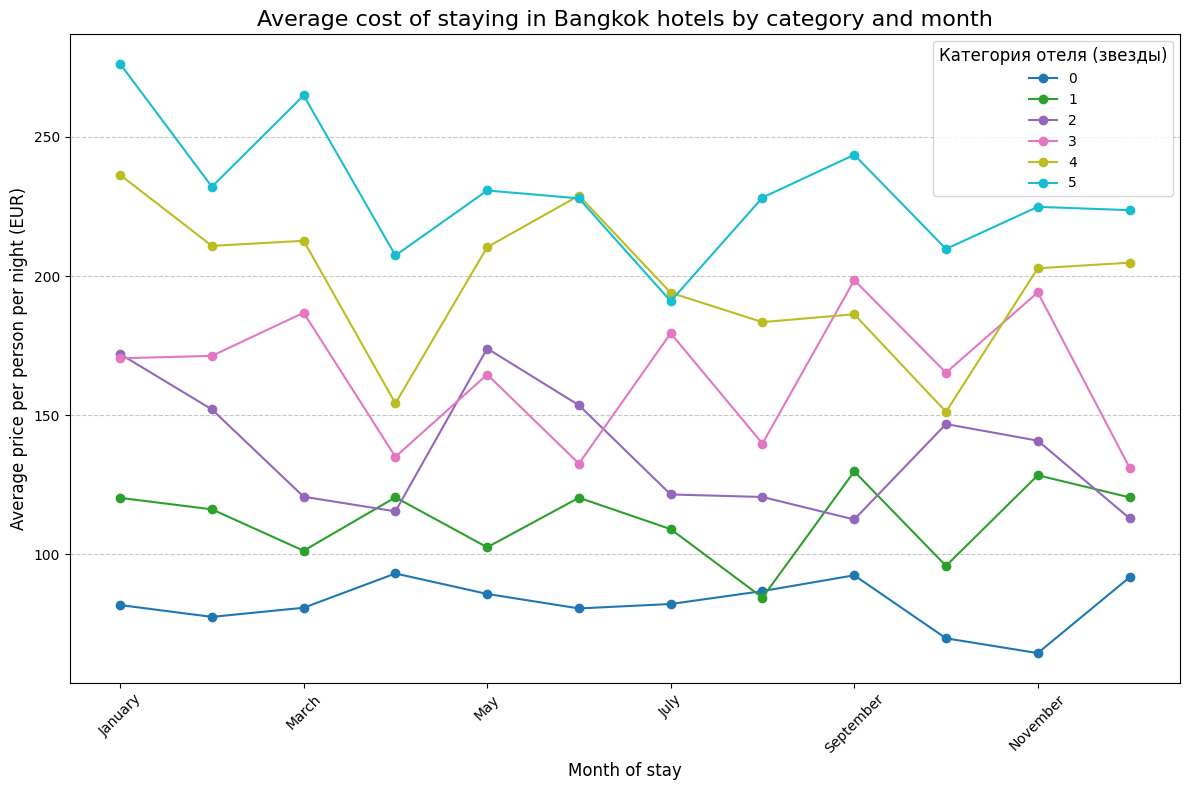

In [31]:
bangkok_hotels = df_v[df_v['destination_region'] == 'Bangkok']
bangkok_hotels['price_per_person_per_night'] = (
    bangkok_hotels['hotel_price_for_full_period'] / bangkok_hotels['number_of_tourists']
)
hotel_prices_by_month = bangkok_hotels.groupby(['month_of_stay', 'hotel_stars'])['price_per_person_per_night'].mean().unstack()
hotel_prices_by_month = hotel_prices_by_month.loc[months_order]
plt.figure(figsize=(12, 8))
hotel_prices_by_month.plot(kind='line', marker='o', figsize=(12, 8), colormap='tab10')
plt.title('Average cost of staying in Bangkok hotels by category and month', fontsize=16)
plt.xlabel('Month of stay', fontsize=12)
plt.ylabel('Average price per person per night (EUR)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Категория отеля (звезды)', title_fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


C:\Users\SONY i5\AppData\Local\Temp\ipykernel_4768\1125486788.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bangkok_hotels['price_per_person_per_night'] = (


<Figure size 1200x800 with 0 Axes>

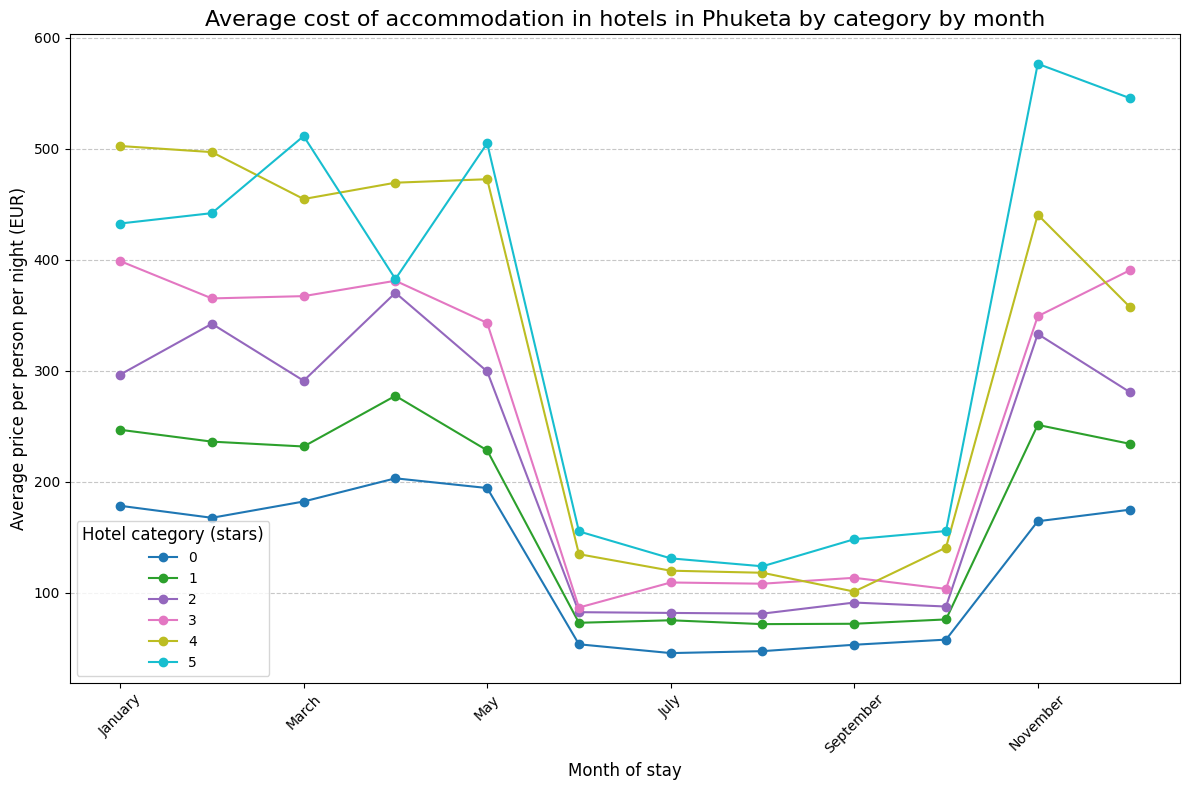

In [32]:
bangkok_hotels = df_v[df_v['destination_region'] == 'Phuket']
bangkok_hotels['price_per_person_per_night'] = (
    bangkok_hotels['hotel_price_for_full_period'] / bangkok_hotels['number_of_tourists']
)
hotel_prices_by_month = bangkok_hotels.groupby(['month_of_stay', 'hotel_stars'])['price_per_person_per_night'].mean().unstack()
hotel_prices_by_month = hotel_prices_by_month.loc[months_order]
plt.figure(figsize=(12, 8))
hotel_prices_by_month.plot(kind='line', marker='o', figsize=(12, 8), colormap='tab10')
plt.title('Average cost of accommodation in hotels in Phuketa by category by month', fontsize=16)
plt.xlabel('Month of stay', fontsize=12)
plt.ylabel('Average price per person per night (EUR)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Hotel category (stars)', title_fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

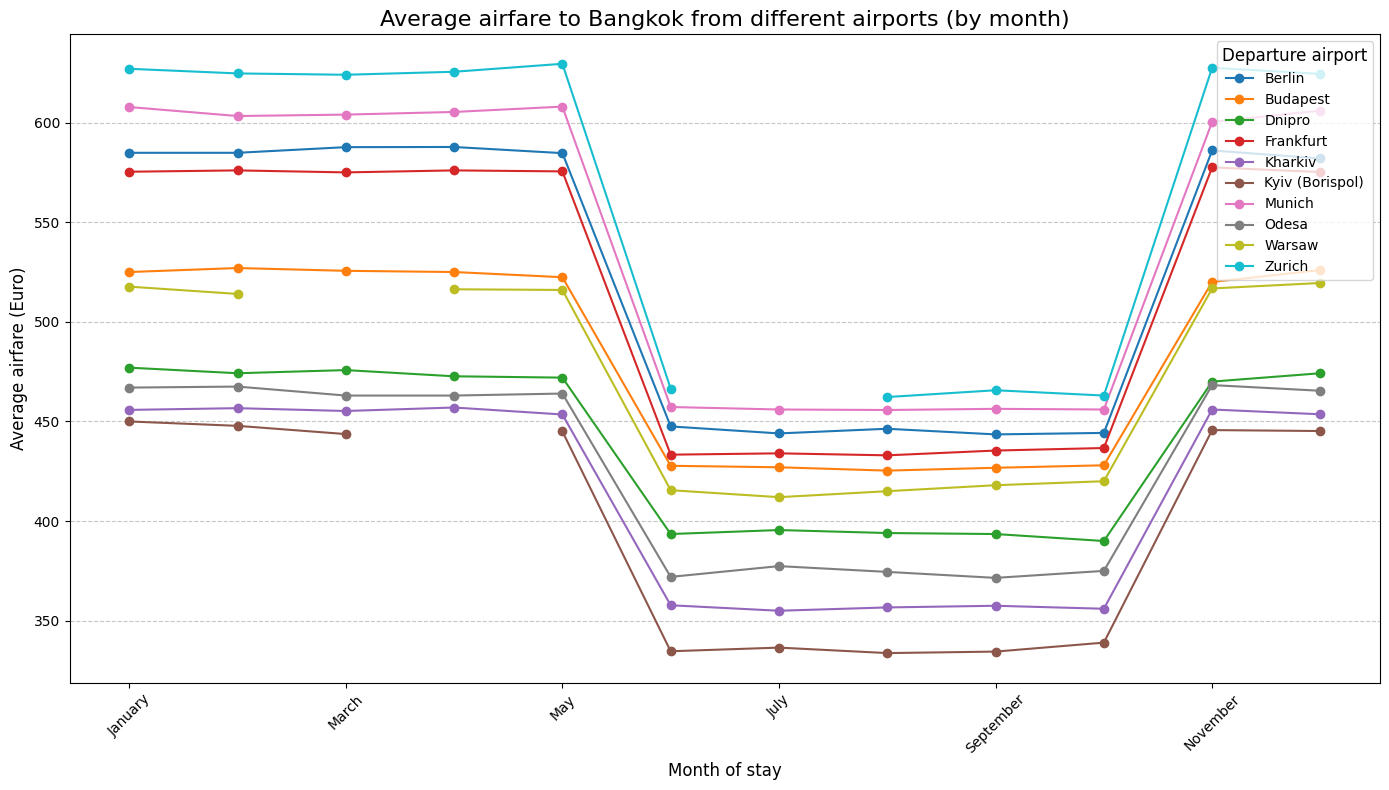

In [33]:
if 'Bangkok' in df_v['destination_region'].unique():
    bangkok_flights = df_v[df_v['destination_region'] == 'Bangkok']
    avg_airfare_by_month_airport = bangkok_flights.groupby(['month_of_stay', 'departure_airport'])['airfare_price_per_tourist'].mean().unstack()
    months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    avg_airfare_by_month_airport = avg_airfare_by_month_airport.loc[months_order]
    plt.figure(figsize=(12, 8))
    avg_airfare_by_month_airport.plot(kind='line', marker='o', figsize=(14, 8), colormap='tab10')
    plt.title('Average airfare to Bangkok from different airports (by month)', fontsize=16)
    plt.xlabel('Month of stay', fontsize=12)
    plt.ylabel('Average airfare (Euro)', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title='Departure airport', title_fontsize=12, loc='upper right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
     print("'Bangkok' destination Error_001")


<Figure size 1200x800 with 0 Axes>

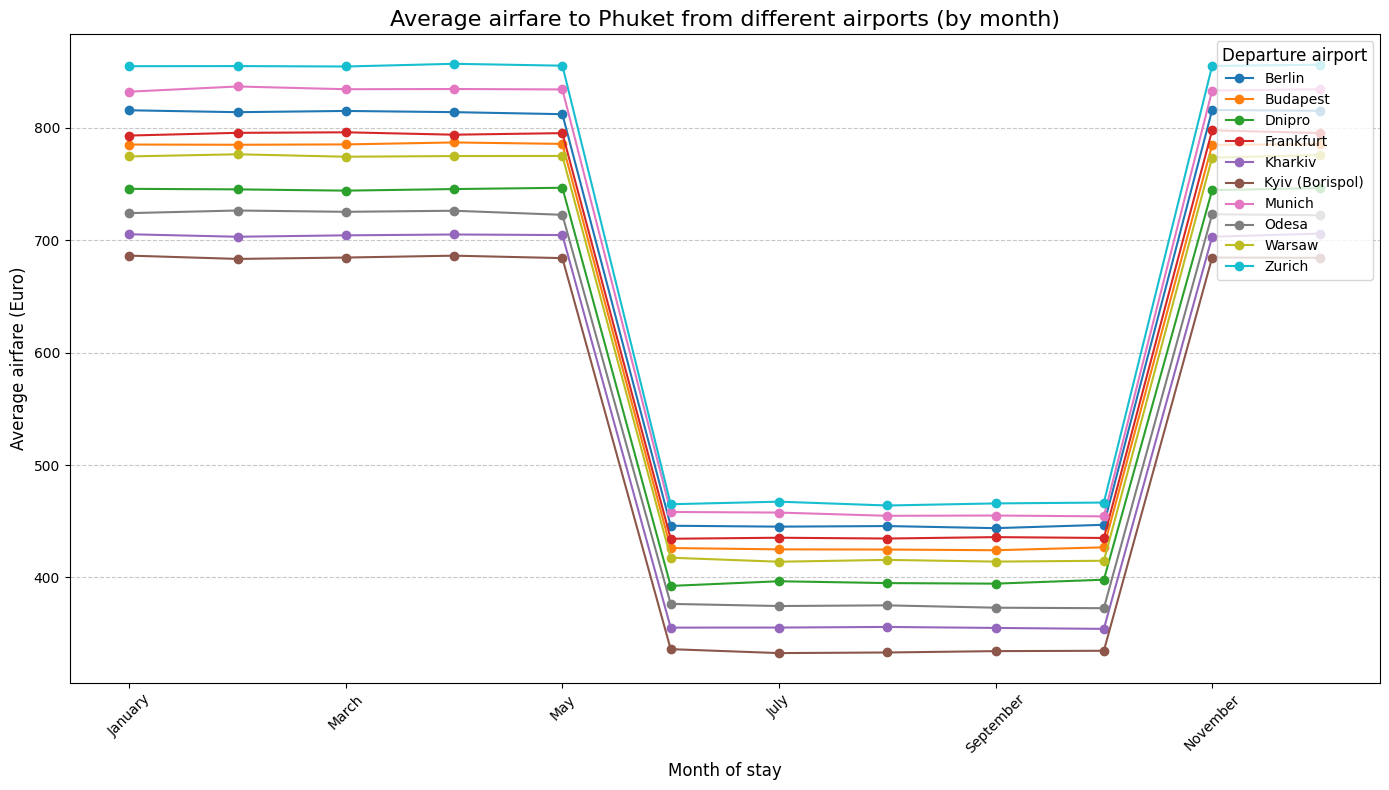

In [34]:
if 'Bangkok' in df_v['destination_region'].unique():
    bangkok_flights = df_v[df_v['destination_region'] == 'Phuket']
    avg_airfare_by_month_airport = bangkok_flights.groupby(['month_of_stay', 'departure_airport'])['airfare_price_per_tourist'].mean().unstack()
    months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    avg_airfare_by_month_airport = avg_airfare_by_month_airport.loc[months_order]
    plt.figure(figsize=(12, 8))
    avg_airfare_by_month_airport.plot(kind='line', marker='o', figsize=(14, 8), colormap='tab10')
    plt.title('Average airfare to Phuket from different airports (by month)', fontsize=16)
    plt.xlabel('Month of stay', fontsize=12)
    plt.ylabel('Average airfare (Euro)', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title='Departure airport', title_fontsize=12, loc='upper right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print(" 'Bangkok' error_001")



<Figure size 1200x800 with 0 Axes>

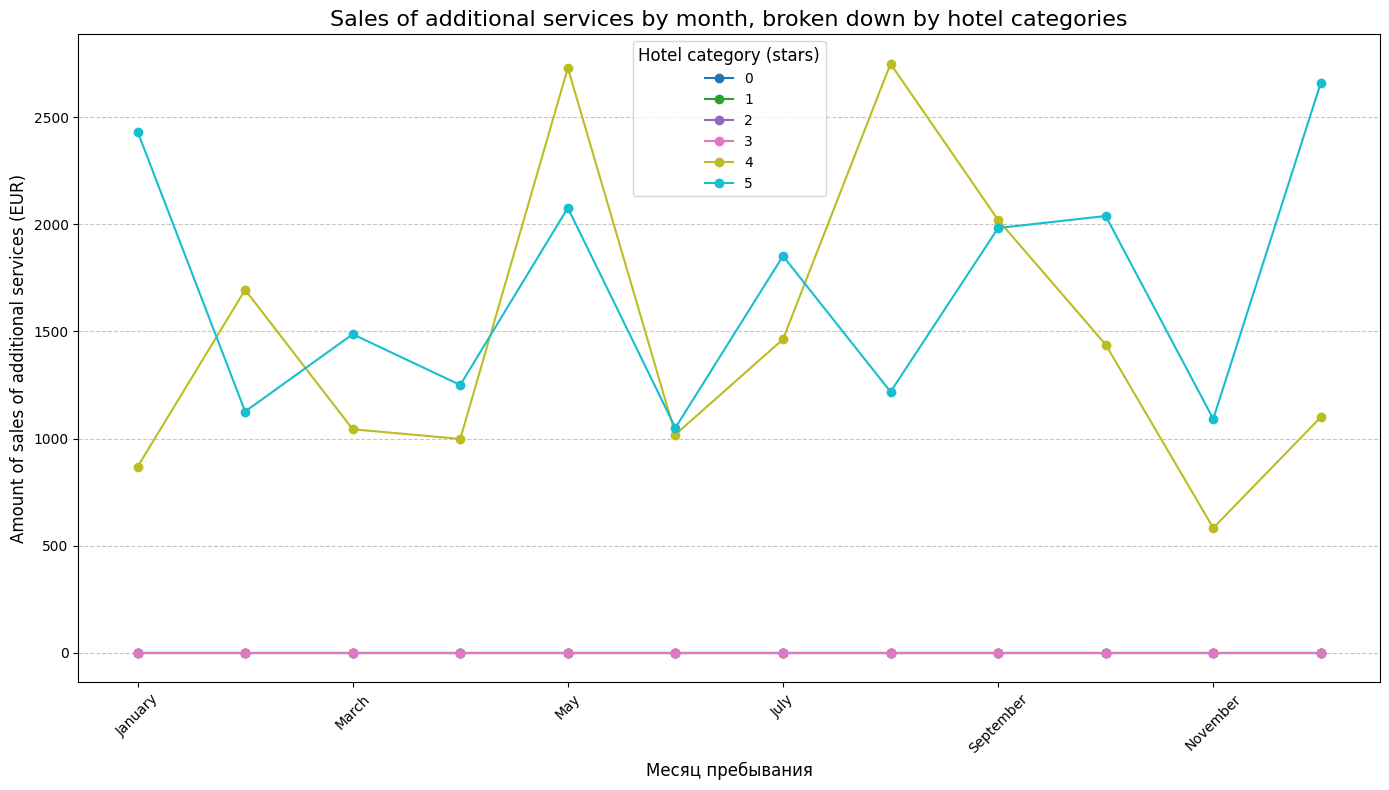

In [35]:
services_sales_by_month_hotel = df_v.groupby(['month_of_stay', 'hotel_stars'])['additional_services_cost'].sum().unstack()

months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
services_sales_by_month_hotel = services_sales_by_month_hotel.loc[months_order]
plt.figure(figsize=(12, 8))
services_sales_by_month_hotel.plot(kind='line', marker='o', figsize=(14, 8), colormap='tab10')
plt.title('Sales of additional services by month, broken down by hotel categories', fontsize=16)
plt.xlabel('Месяц пребывания', fontsize=12)
plt.ylabel('Amount of sales of additional services (EUR)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Hotel category (stars)', title_fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

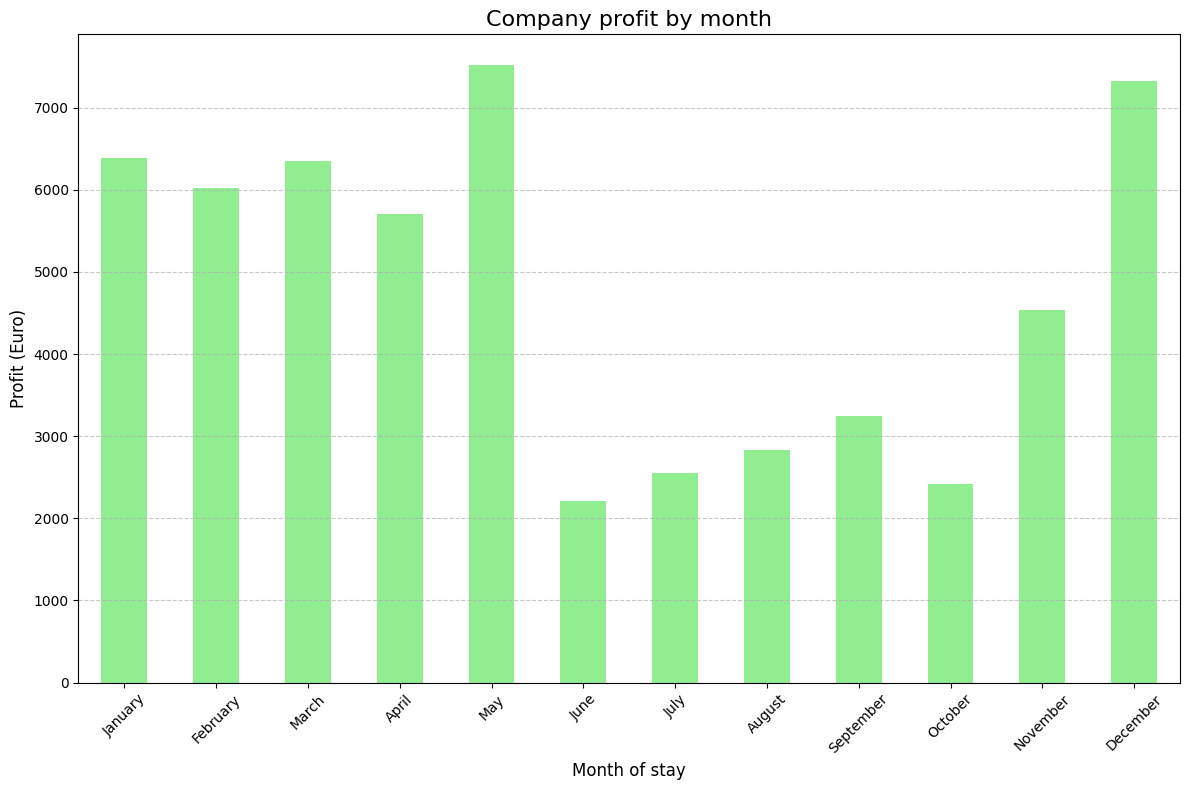

In [36]:
profit_by_month = df_v.groupby('month_of_stay')['profit_after_agency_commission_and_tax'].sum()

months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
profit_by_month = profit_by_month.loc[months_order]

plt.figure(figsize=(12, 8))
profit_by_month.plot(kind='bar', color='lightgreen')

plt.title('Company profit by month', fontsize=16)
plt.xlabel('Month of stay', fontsize=12)
plt.ylabel('Profit (Euro)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

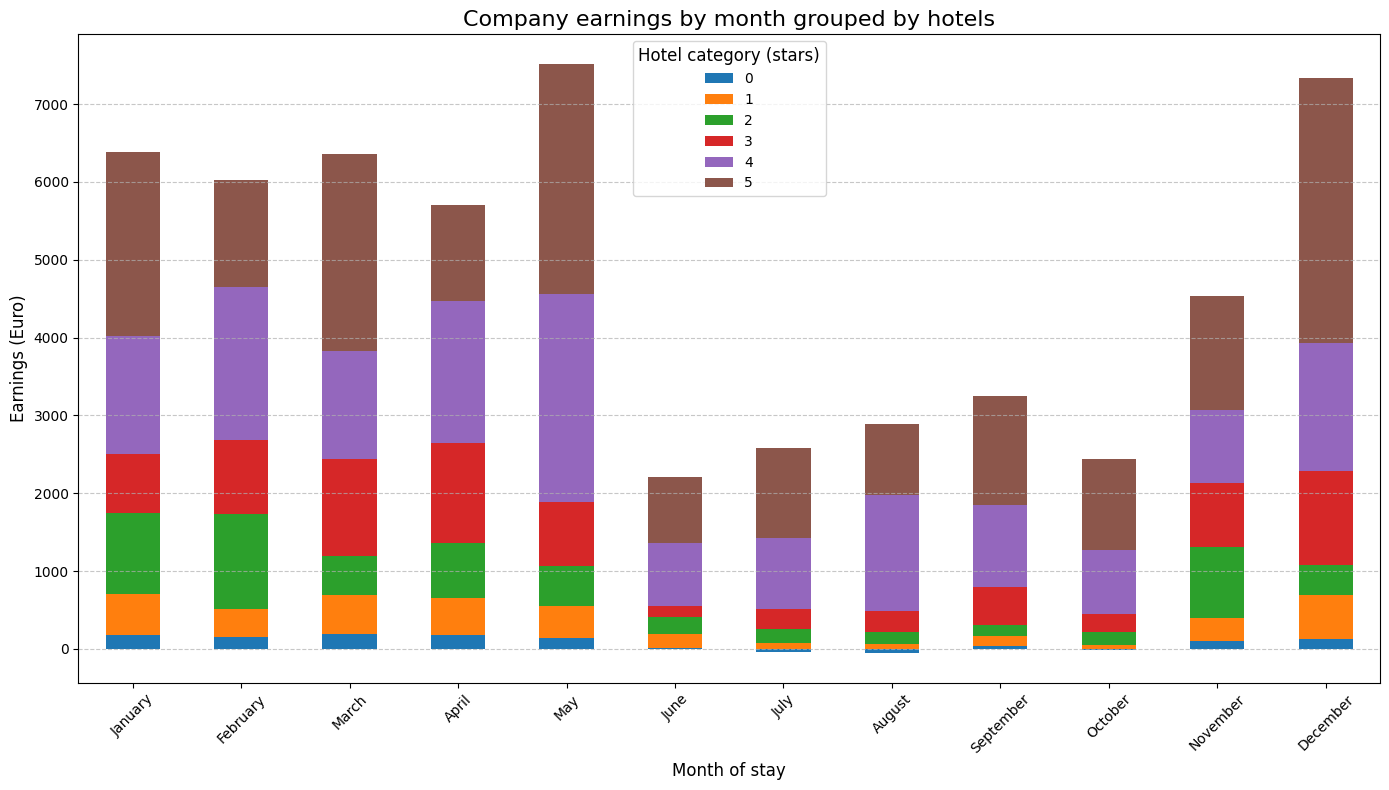

In [37]:
profit_by_month_and_hotel = df_v.groupby(['month_of_stay', 'hotel_stars'])['profit_after_agency_commission_and_tax'].sum().unstack()
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
profit_by_month_and_hotel = profit_by_month_and_hotel.loc[months_order]

plt.figure(figsize=(12, 8))
profit_by_month_and_hotel.plot(kind='bar', stacked=True, figsize=(14, 8))

plt.title('Company earnings by month grouped by hotels', fontsize=16)
plt.xlabel('Month of stay', fontsize=12)
plt.ylabel('Earnings (Euro)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Hotel category (stars)', title_fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

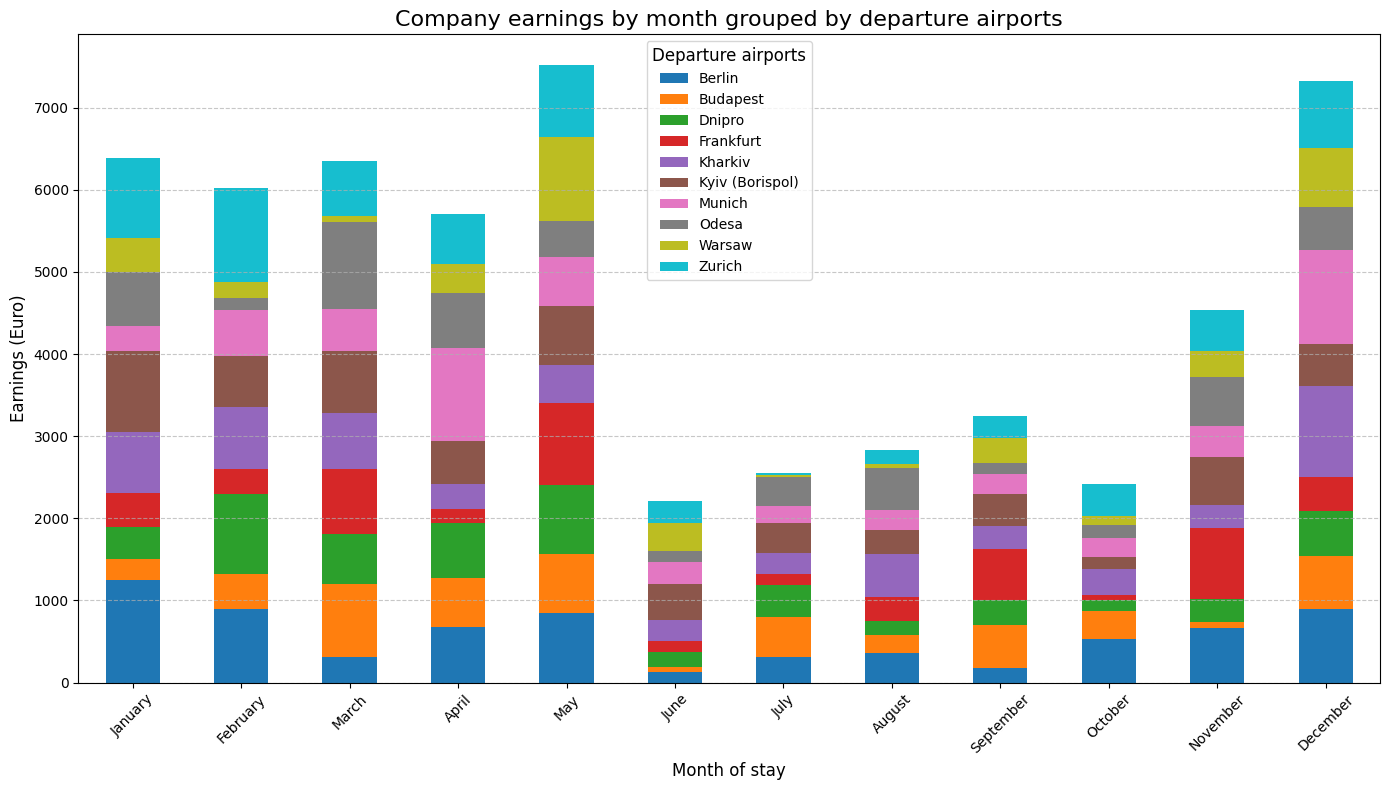

In [38]:
profit_by_month_and_hotel = df_v.groupby(['month_of_stay', 'departure_airport'])['profit_after_agency_commission_and_tax'].sum().unstack()
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
profit_by_month_and_hotel = profit_by_month_and_hotel.loc[months_order]

plt.figure(figsize=(12, 8))
profit_by_month_and_hotel.plot(kind='bar', stacked=True, figsize=(14, 8))

plt.title('Company earnings by month grouped by departure airports', fontsize=16)
plt.xlabel('Month of stay', fontsize=12)
plt.ylabel('Earnings (Euro)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Departure airports', title_fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

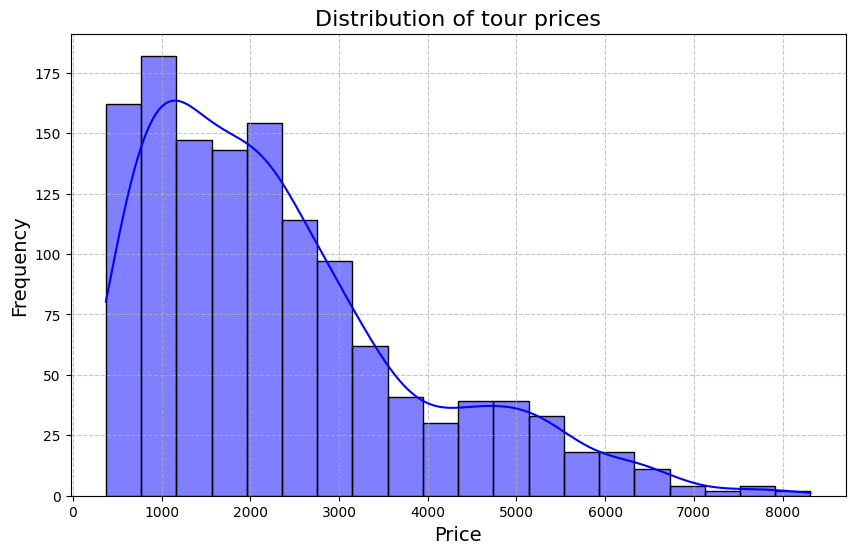

In [50]:
plt.figure(figsize=(10, 6))
sns.histplot(df_v['total_tour_price'], bins=20, kde=True, color='blue') 
plt.title('Distribution of tour prices', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [10]:
print(df.head().to_string())


     id sales_date     status agency_name agency_category tour_start_date tour_end_date  tour_duration month_of_stay season departure_airport destination_country destination_region arrival_airport hotel_name  hotel_stars  hotel_rating_on_tours.ua  number_of_tourists room_category  airfare_price_per_tourist  airfare_for_all_tourists  hotel_price_per_night_per_tourist  hotel_price_per_night_for_all_tourists  hotel_price_for_full_period    transfer  transfer_cost additional_services  additional_services_cost  airfare_cost_price  hotel_cost_price  transfer_cost_price  additional_services_cost_price  tour_cost_price  total_tour_price  total_profit  agency_commission  profit_after_agency_commission  profit_after_agency_commission_and_tax  profit_margin  tour_price_per_day  tour_price_pp_per_day
0  2824 2018-04-01  cancelled   Agency_17     tour office      2019-10-01    2019-10-15             14       October    low            Dnipro            Thailand            Bangkok         Bangkok   H

In [11]:
df_1 = df_1.fillna(0)

In [12]:
df_1.isnull().sum()

id                                        0
sales_date                                0
status                                    0
agency_name                               0
agency_category                           0
tour_start_date                           0
tour_end_date                             0
tour_duration                             0
month_of_stay                             0
season                                    0
departure_airport                         0
destination_country                       0
destination_region                        0
arrival_airport                           0
hotel_name                                0
hotel_stars                               0
hotel_rating_on_tours.ua                  0
number_of_tourists                        0
room_category                             0
airfare_price_per_tourist                 0
airfare_for_all_tourists                  0
hotel_price_per_night_per_tourist         0
hotel_price_per_night_for_all_to

In [13]:
print(df_1.columns.tolist())

['id', 'sales_date', 'status', 'agency_name', 'agency_category', 'tour_start_date', 'tour_end_date', 'tour_duration', 'month_of_stay', 'season', 'departure_airport', 'destination_country', 'destination_region', 'arrival_airport', 'hotel_name', 'hotel_stars', 'hotel_rating_on_tours.ua', 'number_of_tourists', 'room_category', 'airfare_price_per_tourist', 'airfare_for_all_tourists', 'hotel_price_per_night_per_tourist', 'hotel_price_per_night_for_all_tourists', 'hotel_price_for_full_period', 'transfer', 'transfer_cost', 'additional_services', 'additional_services_cost', 'airfare_cost_price', 'hotel_cost_price', 'transfer_cost_price', 'additional_services_cost_price', 'tour_cost_price', 'total_tour_price', 'total_profit', 'agency_commission', 'profit_after_agency_commission', 'profit_after_agency_commission_and_tax', 'profit_margin', 'tour_price_per_day', 'tour_price_pp_per_day']


In [14]:
#df1 = pd.get_dummies(df, columns=['season', 'agency name', 'agency category', 'month of stay', 'departure airport', 'airport of arrival'], drop_first=True)
df_1 = pd.get_dummies(df, columns=['season', 'month_of_stay','destination_region'], drop_first=True)



In [15]:
print(df_1.dtypes)

id                                                 int64
sales_date                                datetime64[ns]
status                                            object
agency_name                                       object
agency_category                                   object
tour_start_date                           datetime64[ns]
tour_end_date                                     object
tour_duration                                      int64
departure_airport                                 object
destination_country                               object
arrival_airport                                   object
hotel_name                                        object
hotel_stars                                        int64
hotel_rating_on_tours.ua                         float64
number_of_tourists                                 int64
room_category                                     object
airfare_price_per_tourist                          int64
airfare_for_all_tourists       

In [16]:
#df1 = df1.apply(pd.to_numeric, errors='ignore')
df_1 = df_1.astype({col: 'int' for col in df_1.select_dtypes('bool').columns})

In [17]:
print(df_1.head().to_string())

     id sales_date     status agency_name agency_category tour_start_date tour_end_date  tour_duration departure_airport destination_country arrival_airport hotel_name  hotel_stars  hotel_rating_on_tours.ua  number_of_tourists room_category  airfare_price_per_tourist  airfare_for_all_tourists  hotel_price_per_night_per_tourist  hotel_price_per_night_for_all_tourists  hotel_price_for_full_period    transfer  transfer_cost additional_services  additional_services_cost  airfare_cost_price  hotel_cost_price  transfer_cost_price  additional_services_cost_price  tour_cost_price  total_tour_price  total_profit  agency_commission  profit_after_agency_commission  profit_after_agency_commission_and_tax  profit_margin  tour_price_per_day  tour_price_pp_per_day  season_low  month_of_stay_August  month_of_stay_December  month_of_stay_February  month_of_stay_January  month_of_stay_July  month_of_stay_June  month_of_stay_March  month_of_stay_May  month_of_stay_November  month_of_stay_October  month_o

In [18]:
df_1.shape

(1302, 51)

In [19]:
print(df_1.columns)

Index(['id', 'sales_date', 'status', 'agency_name', 'agency_category',
       'tour_start_date', 'tour_end_date', 'tour_duration',
       'departure_airport', 'destination_country', 'arrival_airport',
       'hotel_name', 'hotel_stars', 'hotel_rating_on_tours.ua',
       'number_of_tourists', 'room_category', 'airfare_price_per_tourist',
       'airfare_for_all_tourists', 'hotel_price_per_night_per_tourist',
       'hotel_price_per_night_for_all_tourists', 'hotel_price_for_full_period',
       'transfer', 'transfer_cost', 'additional_services',
       'additional_services_cost', 'airfare_cost_price', 'hotel_cost_price',
       'transfer_cost_price', 'additional_services_cost_price',
       'tour_cost_price', 'total_tour_price', 'total_profit',
       'agency_commission', 'profit_after_agency_commission',
       'profit_after_agency_commission_and_tax', 'profit_margin',
       'tour_price_per_day', 'tour_price_pp_per_day', 'season_low',
       'month_of_stay_August', 'month_of_stay_Dece

In [20]:
df_numeric = df_1.select_dtypes(include='number')
df_numeric.head()

,id,tour_duration,hotel_stars,hotel_rating_on_tours.ua,number_of_tourists,airfare_price_per_tourist,airfare_for_all_tourists,hotel_price_per_night_per_tourist,hotel_price_per_night_for_all_tourists,hotel_price_for_full_period,...,month_of_stay_February,month_of_stay_January,month_of_stay_July,month_of_stay_June,month_of_stay_March,month_of_stay_May,month_of_stay_November,month_of_stay_October,month_of_stay_September,destination_region_Phuket
0,2824,14,2,1.60,2,390,780,13.35,26.70,373.8,...,0,0,0,0,0,0,0,1,0,0
1,1409,10,3,8.81,5,429,2145,15.06,75.30,753.0,...,0,0,0,0,0,0,0,1,0,0
2,5506,10,2,1.63,2,460,920,12.74,25.48,254.8,...,0,0,0,1,0,0,0,0,0,0
3,5012,14,4,1.18,3,458,1374,19.10,57.30,802.2,...,0,0,0,0,1,0,0,0,0,0
4,4657,7,0,9.10,2,785,1570,14.85,29.70,207.9,...,0,1,0,0,0,0,0,0,0,1


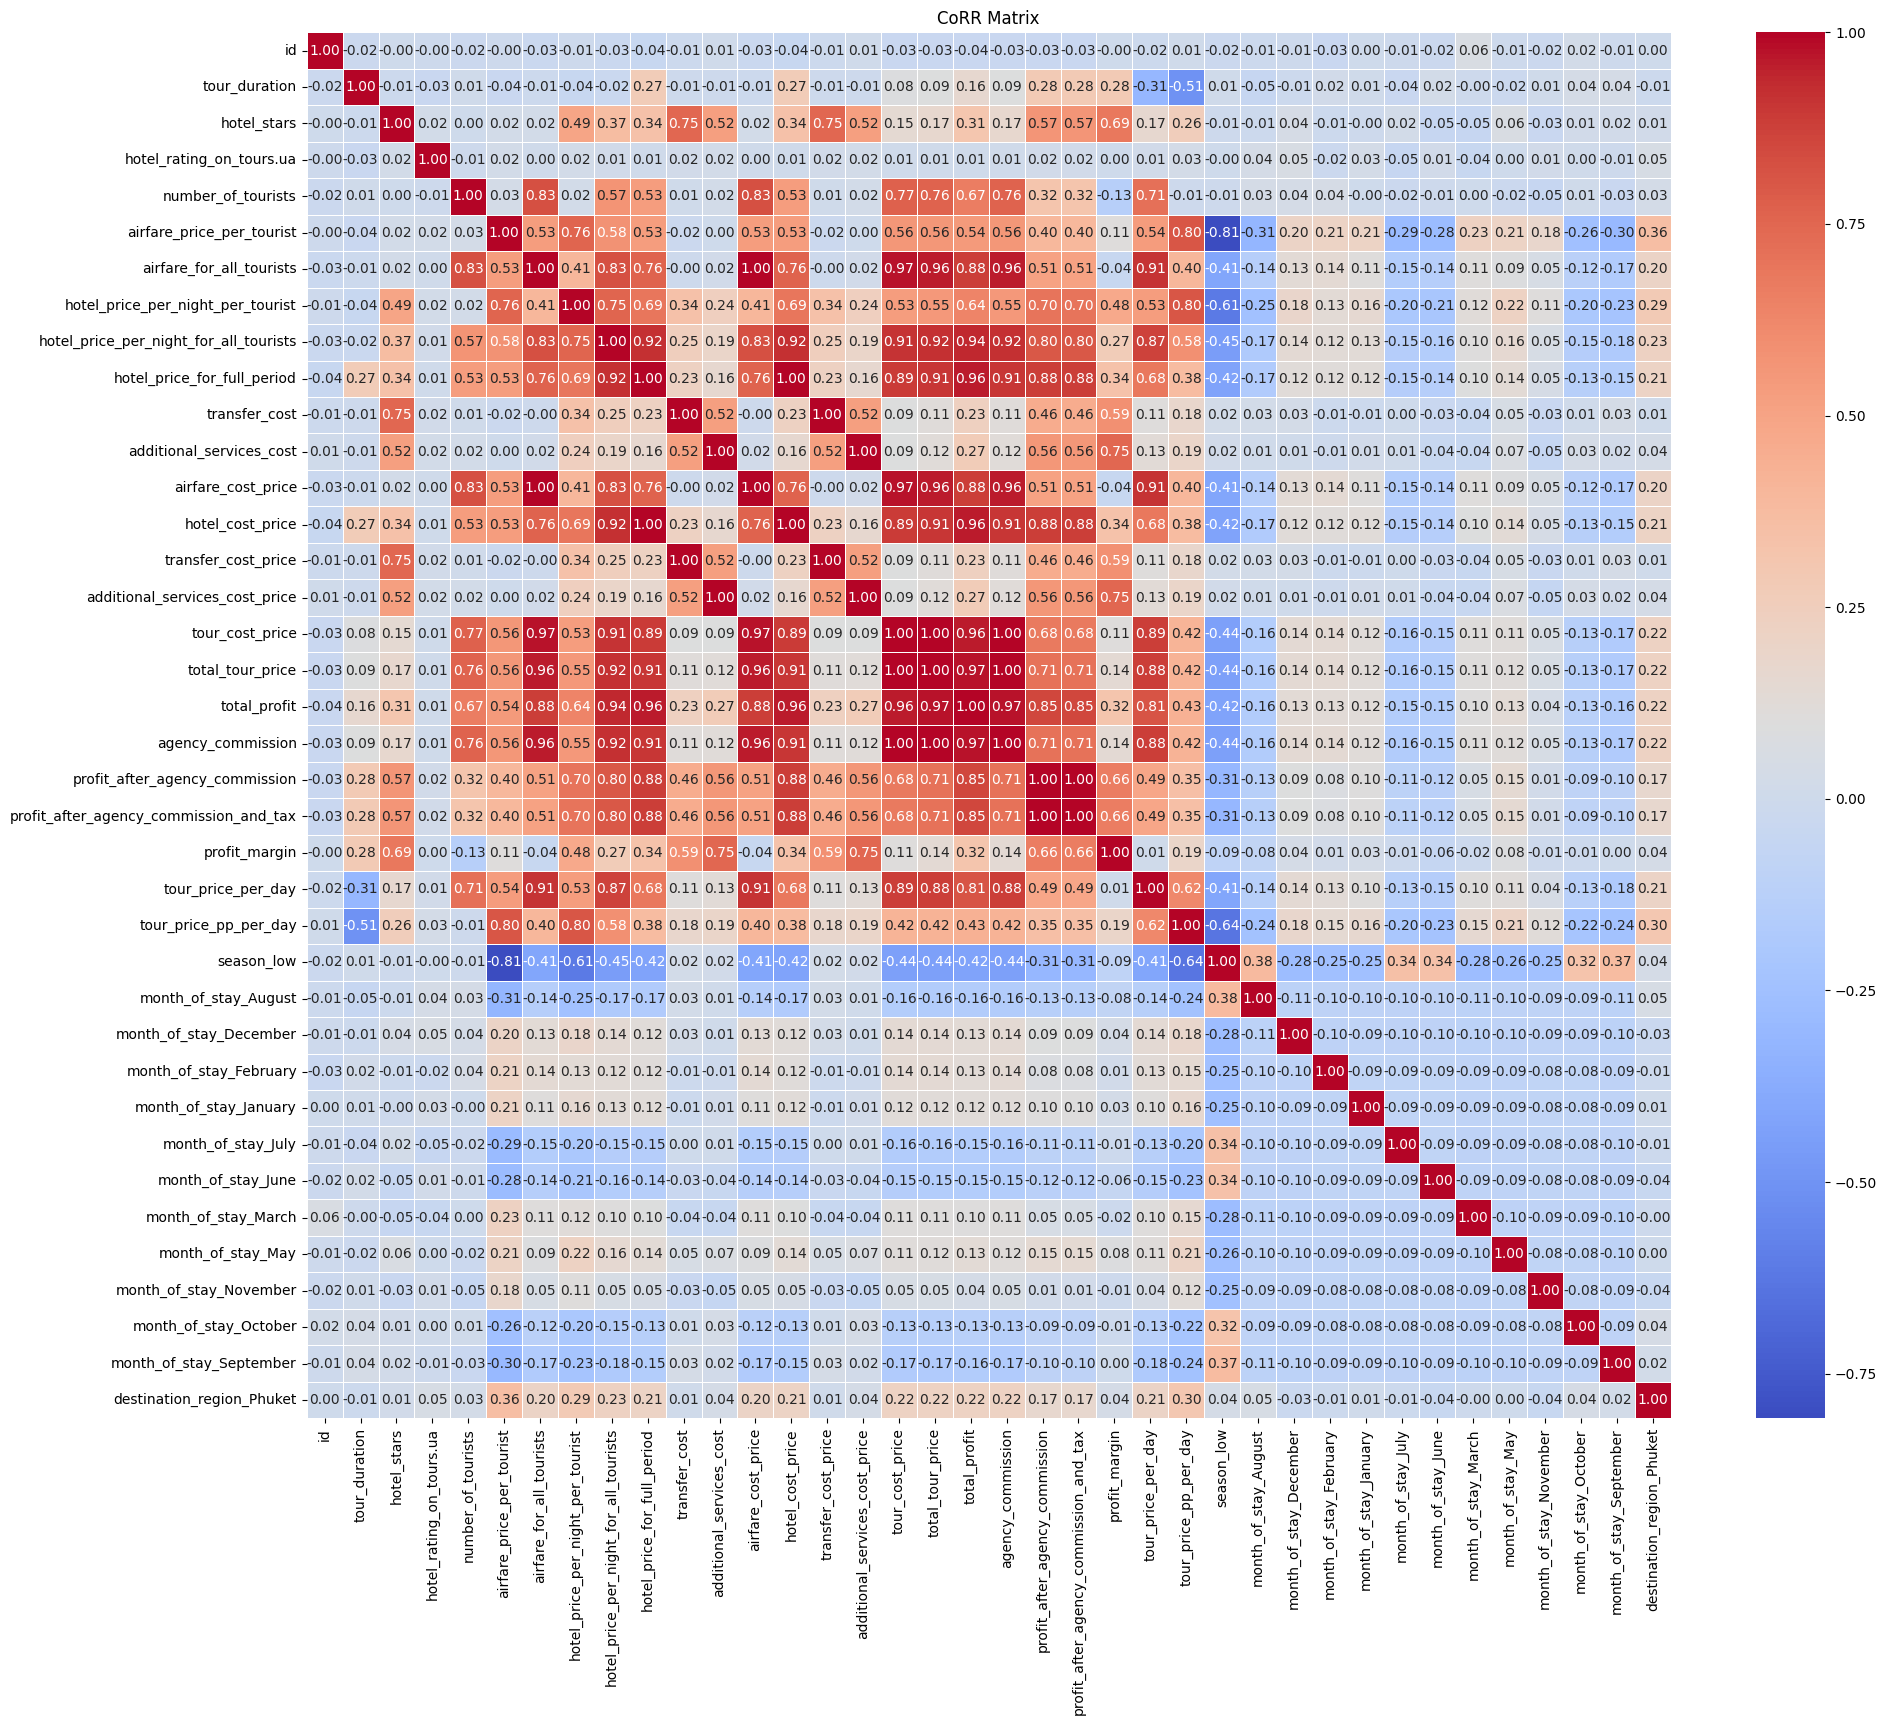

In [21]:
corr_matrix = df_numeric.corr()
plt.figure(figsize=(22, 18))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("CoRR Matrix")
plt.show()

In [22]:
correlation = df_numeric.corr()['total_tour_price'].abs().sort_values(ascending = False)
correlation
top_20_correlation = correlation.head(30)
print(top_20_correlation)

total_tour_price                          1.000000
agency_commission                         1.000000
tour_cost_price                           0.999347
total_profit                              0.972587
airfare_cost_price                        0.964295
airfare_for_all_tourists                  0.964295
hotel_price_per_night_for_all_tourists    0.917651
hotel_cost_price                          0.905578
hotel_price_for_full_period               0.905578
tour_price_per_day                        0.880352
number_of_tourists                        0.760421
profit_after_agency_commission_and_tax    0.706509
profit_after_agency_commission            0.706507
airfare_price_per_tourist                 0.557904
hotel_price_per_night_per_tourist         0.549773
season_low                                0.435734
tour_price_pp_per_day                     0.422236
destination_region_Phuket                 0.218394
hotel_stars                               0.171834
month_of_stay_September        

In [23]:
df_4 = df_numeric  [['total_tour_price','season_low', 'number_of_tourists',
'destination_region_Phuket',
'hotel_stars',
#'month_of_stay_September',
#'month_of_stay_July',
#'month_of_stay_August',
#'month_of_stay_June',
#'month_of_stay_December',
#'month_of_stay_February',
#'airfare_cost_price',
#'hotel_cost_price'
]]


print(df_4.columns)

Index(['total_tour_price', 'season_low', 'number_of_tourists',
       'destination_region_Phuket', 'hotel_stars'],
      dtype='object')


In [24]:
columns_to_check = ['total_tour_price', 'season_low', 'number_of_tourists',
                    'destination_region_Phuket', 'hotel_stars',
                    #'month_of_stay_September', 'month_of_stay_July',
                    #'month_of_stay_August', 'month_of_stay_June',
                    #'month_of_stay_December', 'month_of_stay_February'
                    ]

outliers_indices = []

for col in columns_to_check:
    Q1 = df_4[col].quantile(0.25)
    Q3 = df_4[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_4[(df_4[col] < lower_bound) | (df_4[col] > upper_bound)]
    print(f"Column: {col}, Number of Outliers: {len(outliers)}")

    outliers_indices.extend(outliers.index)
df_4 = df_4.drop(index=outliers_indices).reset_index(drop=True)



Column: total_tour_price, Number of Outliers: 41
Column: season_low, Number of Outliers: 0
Column: number_of_tourists, Number of Outliers: 0
Column: destination_region_Phuket, Number of Outliers: 0
Column: hotel_stars, Number of Outliers: 0


In [25]:
df_4 = df_4.fillna(df_numeric.median())
df_4 = df_4.dropna()

In [26]:
X = df_4.drop(['total_tour_price'], axis=1)
y = df_4['total_tour_price']

In [58]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [59]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

C:\Users\SONY i5\AppData\Local\Temp\ipykernel_9384\3971674845.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=importance_df, palette='coolwarm')


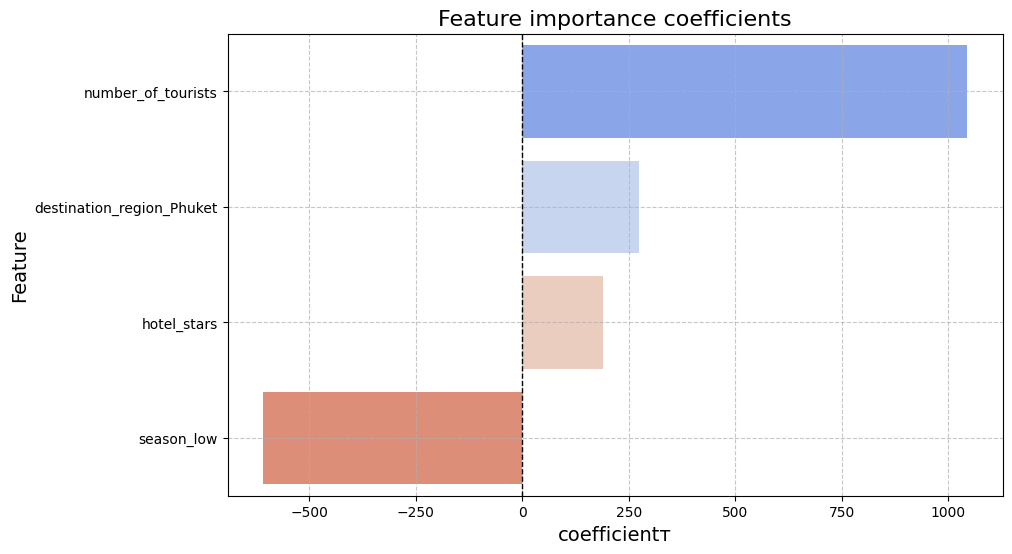

In [45]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

coefficients = model.coef_
features = X.columns

importance_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=importance_df, palette='coolwarm')
plt.title('Feature importance coefficients', fontsize=16)
plt.xlabel('coefficientт', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [61]:
y_pred = model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"R²: {r2}")
print(f"RMSE: {rmse}")

R²: 0.8371233515251235
RMSE: 527.0172273111277


c:\Users\SONY i5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


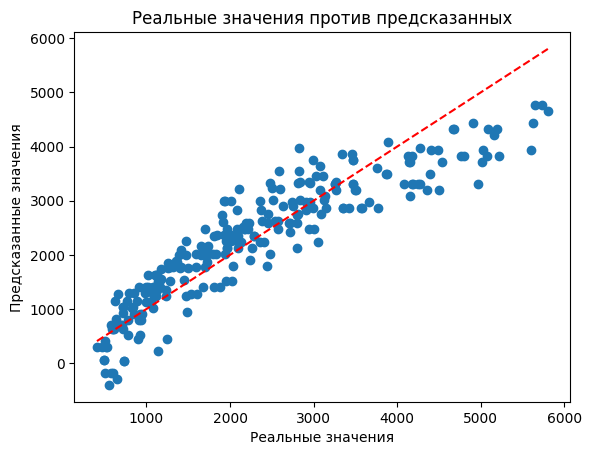

In [47]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Реальные значения")
plt.ylabel("Предсказанные значения")
plt.title("Реальные значения против предсказанных")
plt.show()